### import necessary libraries


In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings


In [259]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

### Load the dataset file



In [260]:
rta_df = pd.read_csv(r'E:\Projects\University\Data Science\Siyavash\Road Traffic Accidents\RTA Dataset.csv')
rta_df.head()


,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [261]:
# unique elements of each column
for col in rta_df.columns:
    print(col, rta_df[col].unique())

Age_band_of_driver ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver ['Male' 'Female' 'Unknown']
Educational_level ['Above high school' 'Junior high school' 'Unknown' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation ['Employee' 'Unknown' 'Owner' 'Other']
Driving_experience ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'Unknown' 'No Licence' 'Below 1yr'
 'unknown']
Lanes_or_Medians ['Unknown' 'Undivided Two way' 'other' 'Double carriageway (median)'
 'One way' 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)']
Types_of_Junction ['No junction' 'Y Shape' 'Crossing' 'O Shape' 'Other' 'Unknown' 'T Shape'
 'X Shape']
Road_surface_type ['Asphalt roads' 'Earth roads' 'Unknown'
 'Asphalt roads with some distress' 'Gravel roads' 'Other']
Light_conditions ['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
Weather_conditions ['Normal' 'Raining' 'Raining and Wi

# EDA

### Data Overview


In [230]:
print("RTA Dataset Overview")
print(rta_df.info())


RTA Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity

### Categorical and Numerical features 

In [231]:
categorical_features = rta_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = rta_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


### Convert categorical features to numerical format using One-Hot Encoding



In [232]:
rta_df = pd.get_dummies(rta_df, columns=categorical_features)


In [234]:
rta_df

,Accident_severity,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Above high school,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,False,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
12312,2,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
12313,1,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
12314,2,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Missing values


In [235]:
print("\nMissing values in RTA Dataset:")
print(rta_df.isnull().sum())



Missing values in RTA Dataset:
Accident_severity                0
Age_band_of_driver_18-30         0
Age_band_of_driver_31-50         0
Age_band_of_driver_Over 51       0
Age_band_of_driver_Under 18      0
                                ..
Cause_of_accident_Overspeed      0
Cause_of_accident_Overtaking     0
Cause_of_accident_Overturning    0
Cause_of_accident_Turnover       0
Cause_of_accident_Unknown        0
Length: 114, dtype: int64


### Fill missing values with median

In [236]:
rta_data = rta_df.fillna(rta_df.median())
print("\nMissing values in RTA Dataset after filling with median:")



Missing values in RTA Dataset after filling with median:


### Unique values


In [237]:
print("\nUnique values in RTA Dataset:")
print(rta_df.nunique())



Unique values in RTA Dataset:
Accident_severity                3
Age_band_of_driver_18-30         2
Age_band_of_driver_31-50         2
Age_band_of_driver_Over 51       2
Age_band_of_driver_Under 18      2
                                ..
Cause_of_accident_Overspeed      2
Cause_of_accident_Overtaking     2
Cause_of_accident_Overturning    2
Cause_of_accident_Turnover       2
Cause_of_accident_Unknown        2
Length: 114, dtype: int64


### Descriptive statistics


In [238]:
print("\nDescriptive statistics for RTA Dataset:")
print(rta_df.describe(include='all'))


Descriptive statistics for RTA Dataset:
        Accident_severity Age_band_of_driver_18-30 Age_band_of_driver_31-50  \
count        12316.000000                    12316                    12316   
unique                NaN                        2                        2   
top                   NaN                    False                    False   
freq                  NaN                     8045                     8229   
mean             1.832819                      NaN                      NaN   
std              0.406082                      NaN                      NaN   
min              0.000000                      NaN                      NaN   
25%              2.000000                      NaN                      NaN   
50%              2.000000                      NaN                      NaN   
75%              2.000000                      NaN                      NaN   
max              2.000000                      NaN                      NaN   

       Age

### Basic Statistics and Structure


In [239]:
print("\nBasic Statistics and Structure for RTA Dataset:")
print(rta_df.describe())



Basic Statistics and Structure for RTA Dataset:
       Accident_severity
count       12316.000000
mean            1.832819
std             0.406082
min             0.000000
25%             2.000000
50%             2.000000
75%             2.000000
max             2.000000


### Data Distribution


<Figure size 1500x1000 with 0 Axes>

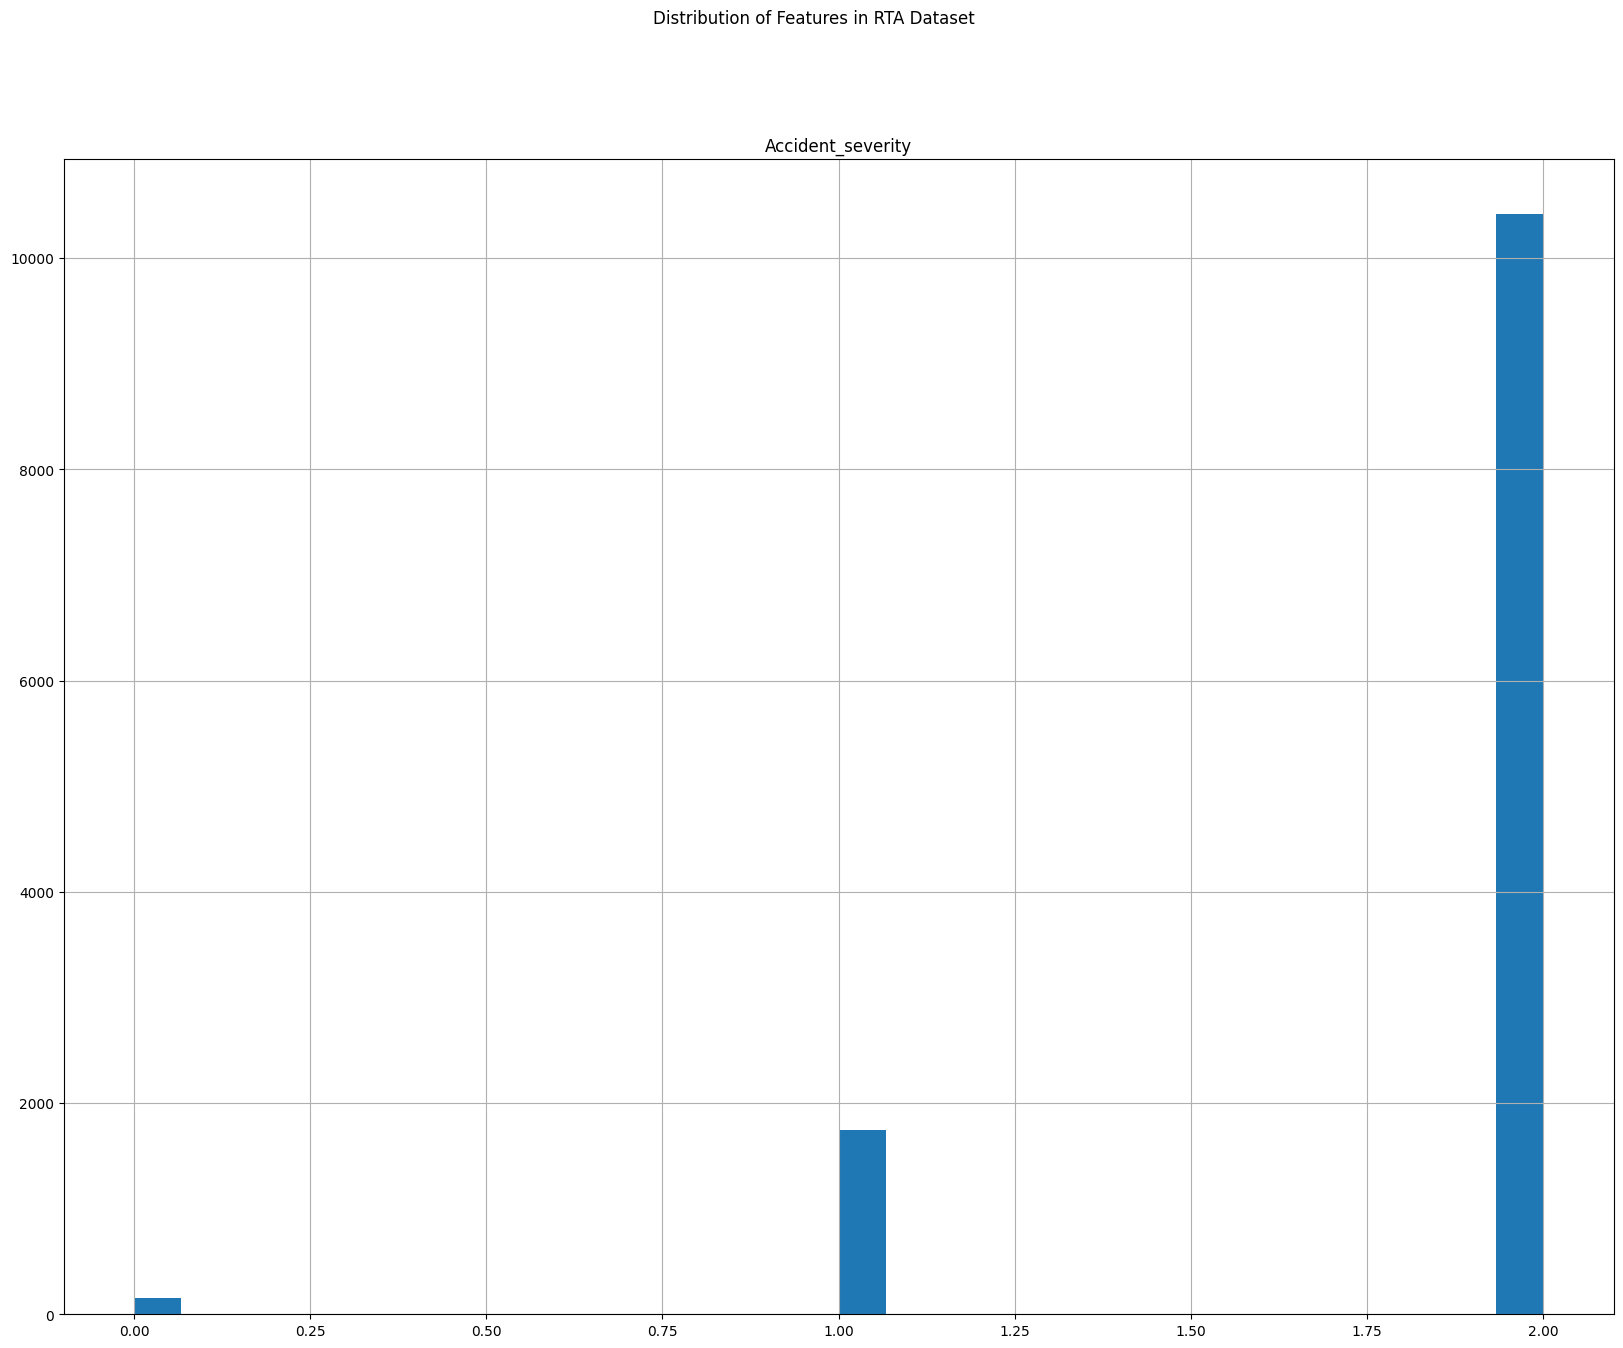

In [240]:
plt.figure(figsize=(15, 10))
rta_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Features in RTA Dataset')
plt.show()

### Identify target feature and input features


In [241]:
# 'Accident_severity' as the target feature
target_feature = 'Accident_severity'
input_features = rta_df.columns.tolist()
input_features.remove(target_feature)


### Split the data into training and test sections


In [242]:
train_df, test_df = train_test_split(rta_df, test_size=0.2, random_state=42)


### Normalize the data


In [243]:
scaler = StandardScaler()
train_df[input_features] = scaler.fit_transform(train_df[input_features])
test_df[input_features] = scaler.transform(test_df[input_features])

X_train = train_df[input_features]
y_train = train_df[target_feature]
X_test = test_df[input_features]
y_test = test_df[target_feature]


### Correlation Heatmap for RTA Dataset


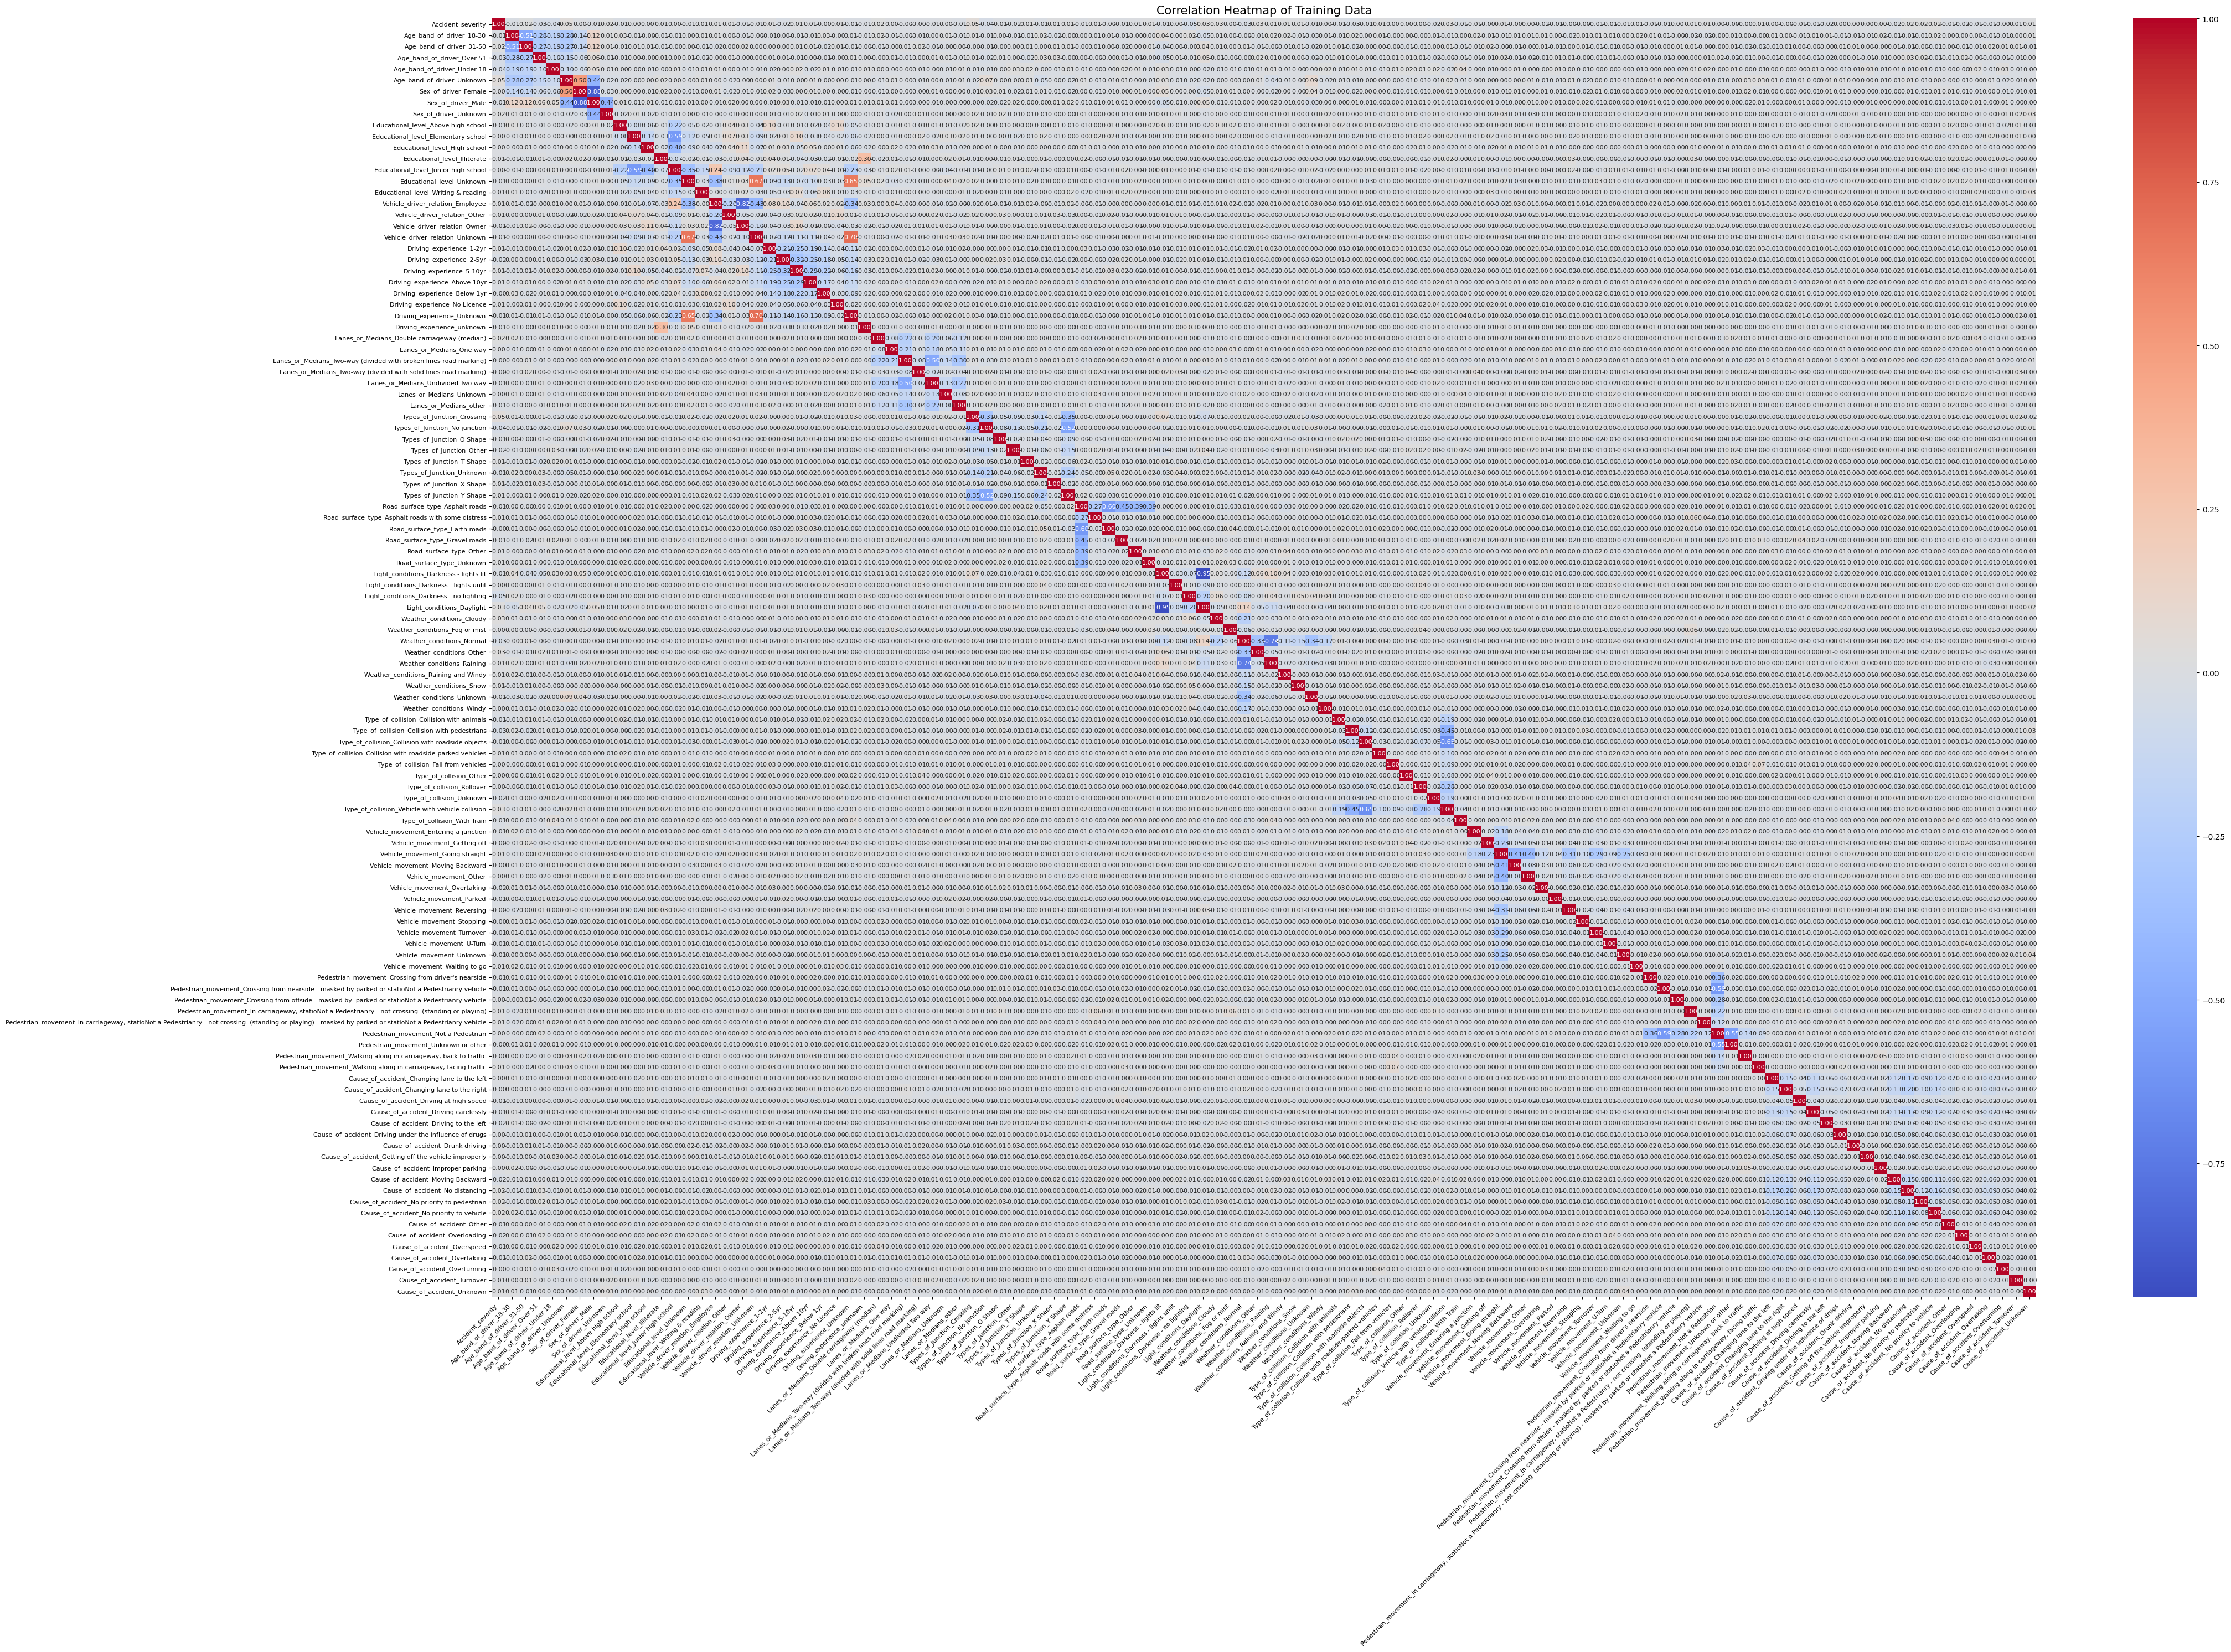

In [257]:
plt.figure(figsize=(45, 30))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Heatmap of Training Data', fontsize=15)
plt.show()


# Training

### XGBoost Classifier


In [245]:
xgb = XGBClassifier(random_state=42)

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
   'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
xgb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1_macro', verbose=2)

### Random Forest


In [246]:
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
rf_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
304 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=2)

### Neural Network


In [247]:
nn = MLPClassifier(max_iter=500, random_state=42)

nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
   'solver': ['adam','sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

nn_grid_search = GridSearchCV(nn, nn_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
nn_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50)],
                         'solver': ['adam', 'sgd']},
             scoring='f1_macro', verbose=2)

### Best estimators

In [251]:
xgb_best = xgb_grid_search.best_estimator_
nn_best = nn_grid_search.best_estimator_
rf_best = rf_grid_search.best_estimator_


In [265]:
print(xgb_grid_search.best_params_)

print(nn_grid_search.best_params_)

print(rf_grid_search.best_params_)

{'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.6}
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


# Testing

### Function to evaluate model


In [252]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.2f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
    print(f"Training F1 Score: {f1_score(y_train, y_pred_train, average='macro'):.2f}")
    print(f"Test F1 Score: {f1_score(y_test, y_pred_test, average='macro'):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

### Evaluate models


XGBoost Classifier Results
Training Accuracy: 0.97
Test Accuracy: 0.82
Training F1 Score: 0.94
Test F1 Score: 0.32

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.18      0.04      0.06       363
           2       0.84      0.97      0.90      2064

    accuracy                           0.82      2464
   macro avg       0.34      0.34      0.32      2464
weighted avg       0.73      0.82      0.76      2464



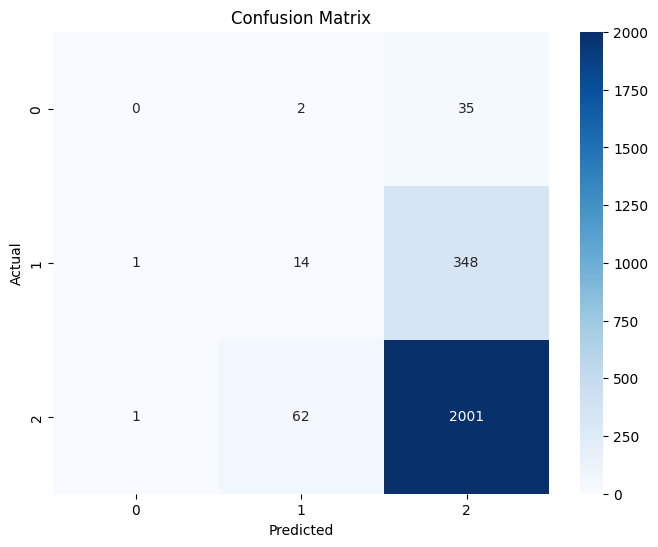

Neural Network Classifier Results
Training Accuracy: 0.99
Test Accuracy: 0.77
Training F1 Score: 0.97
Test F1 Score: 0.33

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.16      0.11      0.13       363
           2       0.84      0.90      0.87      2064

    accuracy                           0.77      2464
   macro avg       0.33      0.34      0.33      2464
weighted avg       0.73      0.77      0.75      2464



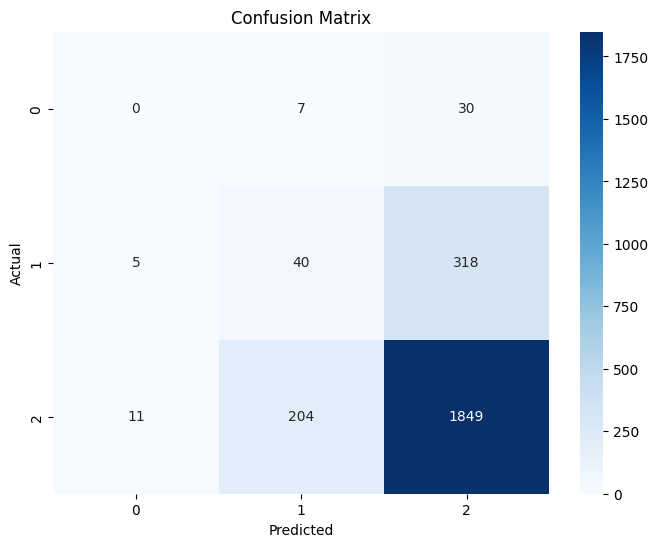

Random Forest Classifier Results
Training Accuracy: 0.85
Test Accuracy: 0.84
Training F1 Score: 0.31
Test F1 Score: 0.30

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464



c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

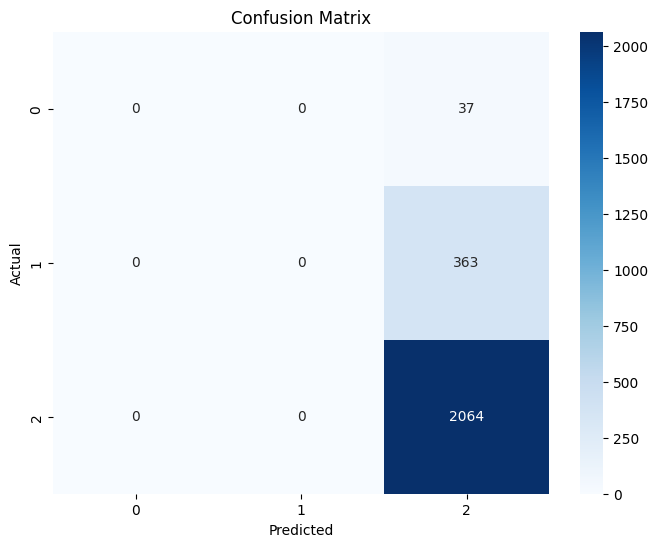

In [253]:
print("XGBoost Classifier Results")
evaluate_model(xgb_best, X_train, y_train, X_test, y_test)

print("Neural Network Classifier Results")
evaluate_model(nn_best, X_train, y_train, X_test, y_test)

print("Random Forest Classifier Results")
evaluate_model(rf_best, X_train, y_train, X_test, y_test)

# Analysing

### Plot the feature importance for Random Forest and XGBoost


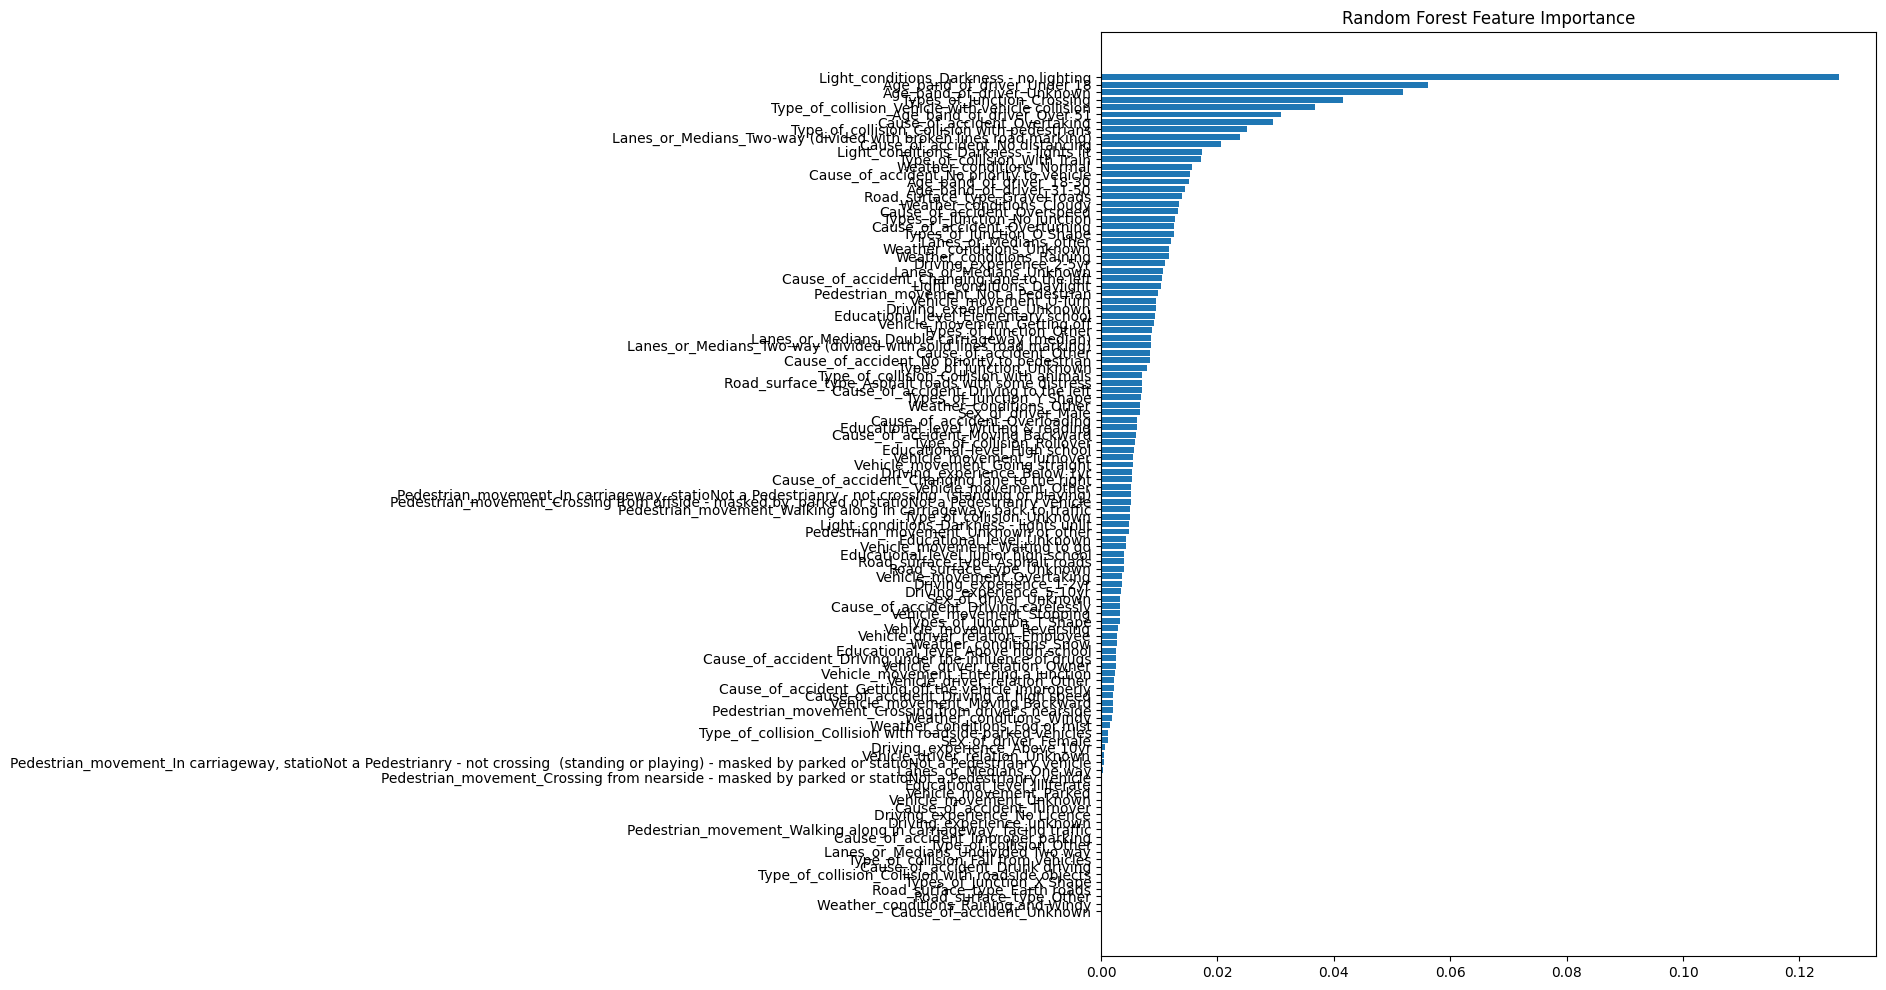

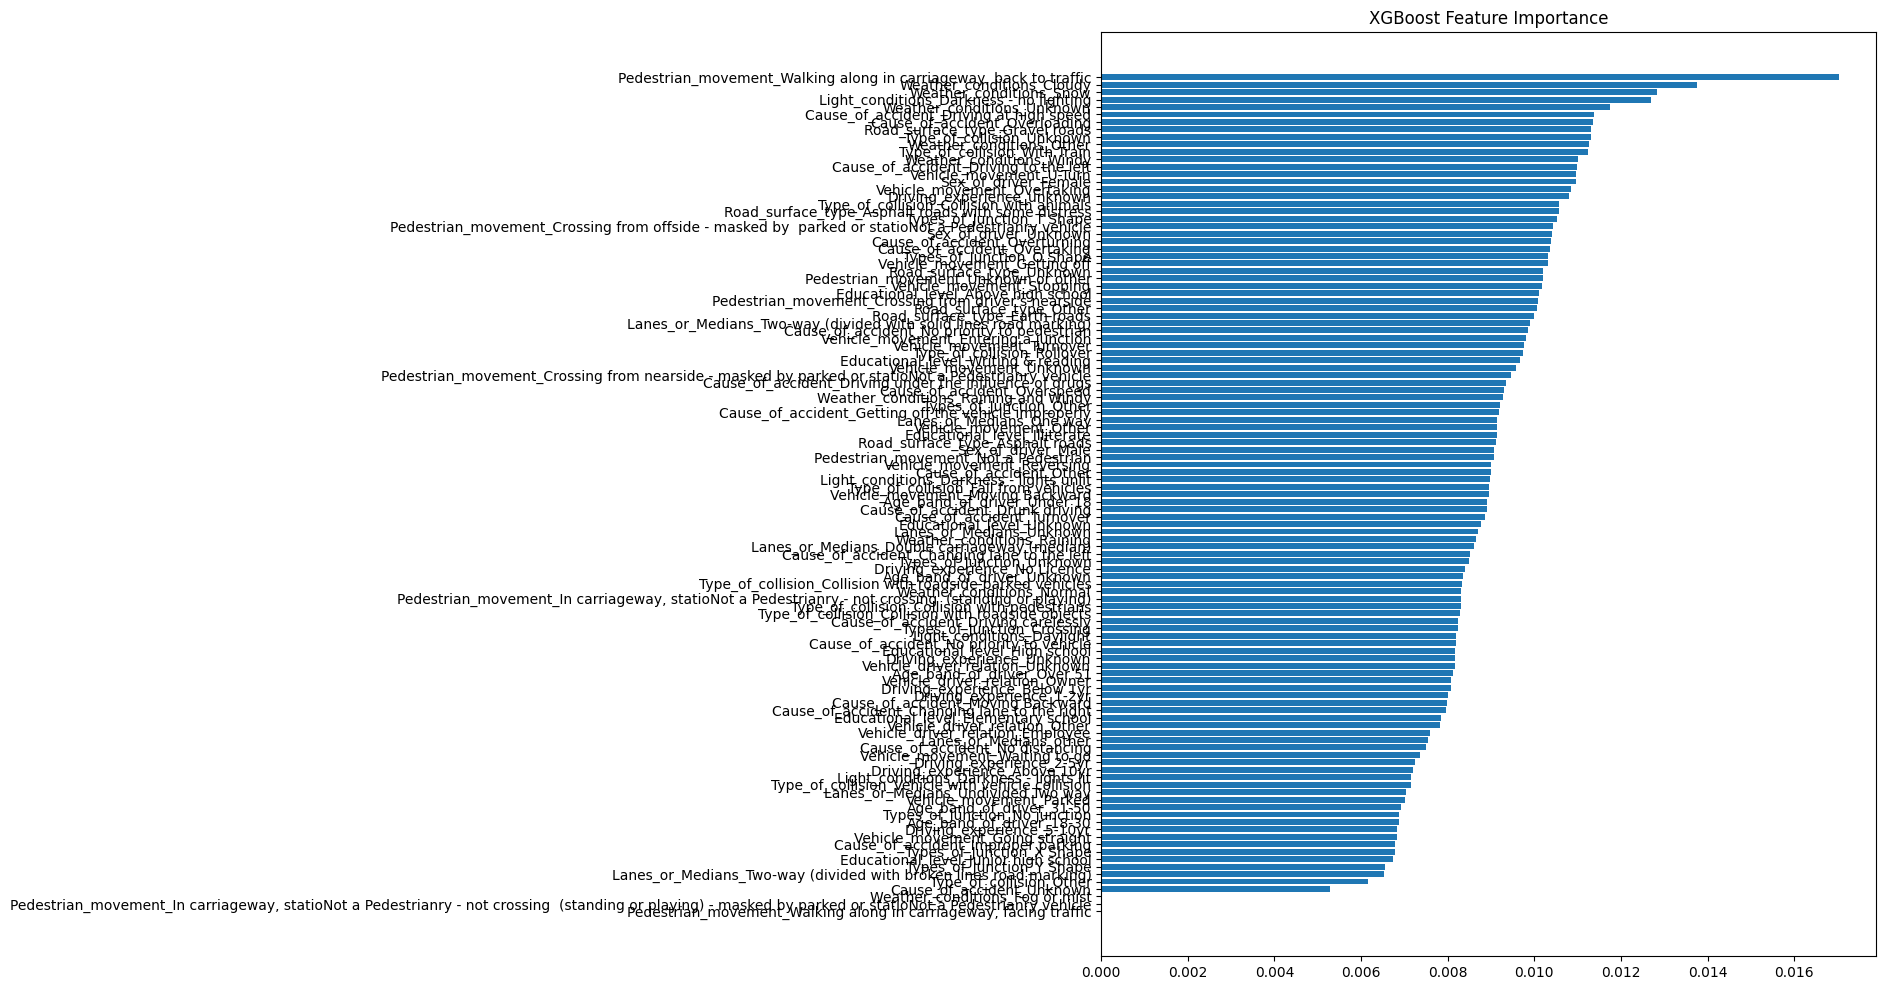

In [254]:
def plot_feature_importance(model, X_train, title):
    feature_importances = model.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    plt.figure(figsize=(10, 12))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
    plt.title(title)
    plt.show()

plot_feature_importance(rf_best, X_train, "Random Forest Feature Importance")
plot_feature_importance(xgb_best, X_train, "XGBoost Feature Importance")


### Summary of results


In [256]:
results = {
    'Model': ['Random Forest', 'Neural Network', 'XGBoost'],
    'Best Parameters': [rf_grid_search.best_params_, nn_grid_search.best_params_, xgb_grid_search.best_params_],
    'Training Accuracy': [accuracy_score(y_train, rf_best.predict(X_train)), 
                          accuracy_score(y_train, nn_best.predict(X_train)), 
                          accuracy_score(y_train, xgb_best.predict(X_train))],
    'Test Accuracy': [accuracy_score(y_test, rf_best.predict(X_test)), 
                      accuracy_score(y_test, nn_best.predict(X_test)), 
                      accuracy_score(y_test, xgb_best.predict(X_test))],
    'Test Precision': [precision_score(y_test, rf_best.predict(X_test), average='weighted'), 
                       precision_score(y_test, nn_best.predict(X_test), average='weighted'), 
                       precision_score(y_test, xgb_best.predict(X_test), average='weighted')],
    'Test Recall': [recall_score(y_test, rf_best.predict(X_test), average='weighted'), 
                    recall_score(y_test, nn_best.predict(X_test), average='weighted'), 
                    recall_score(y_test, xgb_best.predict(X_test), average='weighted')],
    'Test F1 Score': [f1_score(y_test, rf_best.predict(X_test), average='weighted'), 
                      f1_score(y_test, nn_best.predict(X_test), average='weighted'), 
                      f1_score(y_test, xgb_best.predict(X_test), average='weighted')]
}

results_df = pd.DataFrame(results)
print(results_df)


c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


            Model                                    Best Parameters  \
0   Random Forest  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
1  Neural Network  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   
2         XGBoost  {'learning_rate': 0.2, 'max_depth': 9, 'n_esti...   

   Training Accuracy  Test Accuracy  Test Precision  Test Recall  \
0           0.847645       0.837662        0.701678     0.837662   
1           0.989139       0.766640        0.728456     0.766640   
2           0.970767       0.817776        0.729531     0.817776   

   Test F1 Score  
0       0.763664  
1       0.746178  
2       0.763024  


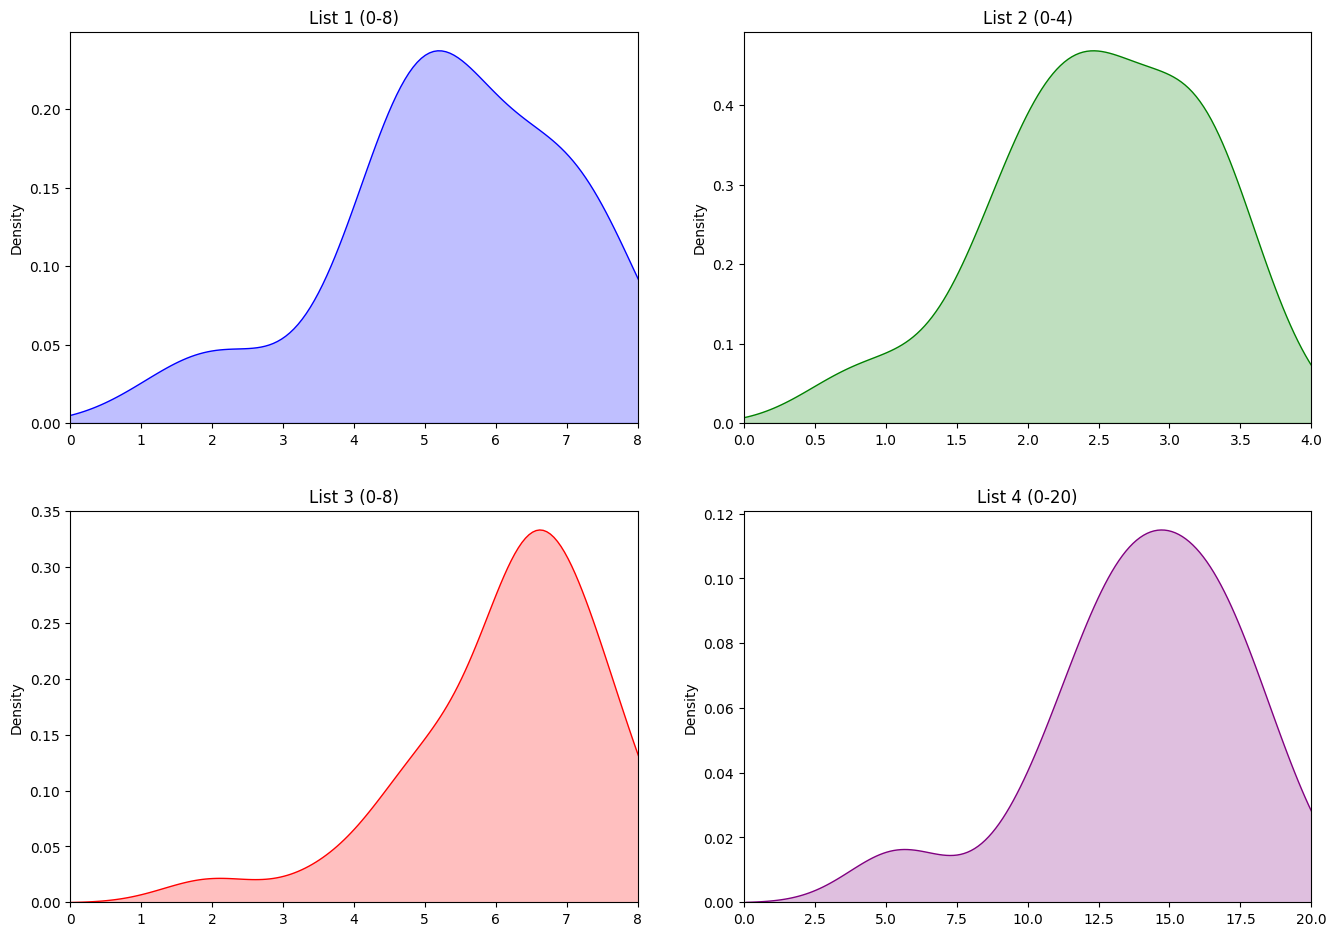

29 29 29 29


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sample data lists
list1 = [7.9, 7.55, 7.15, 7.5, 7.25, 6.35, 6.1, 7, 6.85, 6.55, 5.25, 6.65, 5.45, 5, 5.4, 5.7, 4.75, 5.2, 4.5, 4.55, 4.95, 5.15, 5.15, 3.85, 4.35, 4.45, 2.25, 1.35, 2.25]
list2 = [3.74, 3.26, 3.17, 2.94, 3.2, 3.34, 3.26, 2.8, 3.17, 2.6, 2.63, 2.37, 3.4, 3.23, 2.66, 1.97, 2.29, 2.17, 2.37, 1.8, 2.4, 2.6, 1.86, 1.51, 1.94, 1.91, 2.26, 0.69, 1.03]
list3 = [7.9, 7.37, 7.8, 7.17, 6.93, 7.4, 7.17, 6.6, 6.03, 6.67, 7.7, 6.33, 6.47, 6.37, 6.3, 6.1, 6.67, 6.2, 6.47, 6.9, 5.47, 4.9, 5.07, 6.47, 4.85, 4.4, 5.1, 3.6, 1.97]
list4 = [19.54, 18.17, 18.12, 17.61, 17.38, 17.09, 16.52, 16.4, 16.05, 15.82, 15.58, 15.35, 15.32, 14.6, 14.36, 13.77, 13.7, 13.57, 13.34, 13.25, 12.82, 12.65, 12.07, 11.83, 11.14, 10.76, 9.61, 5.64, 5.25]

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot KDE plots for each list
sns.kdeplot(list1, ax=axs[0, 0], fill=True, color='blue')
axs[0, 0].set_title('List 1 (0-8)')
axs[0, 0].set_xlim(0, 8)

sns.kdeplot(list2, ax=axs[0, 1], fill=True, color='green')
axs[0, 1].set_title('List 2 (0-4)')
axs[0, 1].set_xlim(0, 4)

sns.kdeplot(list3, ax=axs[1, 0], fill=True, color='red')
axs[1, 0].set_title('List 3 (0-8)')
axs[1, 0].set_xlim(0, 8)

sns.kdeplot(list4, ax=axs[1, 1], fill=True, color='purple')
axs[1, 1].set_title('List 4 (0-20)')
axs[1, 1].set_xlim(0, 20)

# Add some space between the plots
fig.tight_layout(pad=3.0)

# Display the plots
plt.show()
print(len(list1), len(list2), len(list3),len(list4))

In [21]:
import numpy as np

def scale_list(data, new_min=0, new_max=20, a=20):
    # multiply (20/a) to each element of data
    
    return [(20/a)*d for d in data]
    
# Scale the lists
list1_scaled = scale_list(list1, 0, 20, 8)
list2_scaled = scale_list(list2, 0, 20, 4)
list3_scaled = scale_list(list3, 0, 20, 8)
list4_scaled = scale_list(list4, 0, 20)

print(f"Means: {np.mean(list1_scaled)}, {np.mean(list2_scaled)}, {np.mean(list3_scaled)}, {np.mean(list4_scaled)}")
print(f"Stds: {np.std(list1_scaled)}, {np.std(list2_scaled)}, {np.std(list3_scaled)}, {np.std(list4_scaled)}")


Means: 13.482758620689655, 12.51206896551724, 15.37758620689655, 14.045172413793104
Stds: 3.992412542217208, 3.594623743497047, 3.239188547995458, 3.335041353917887


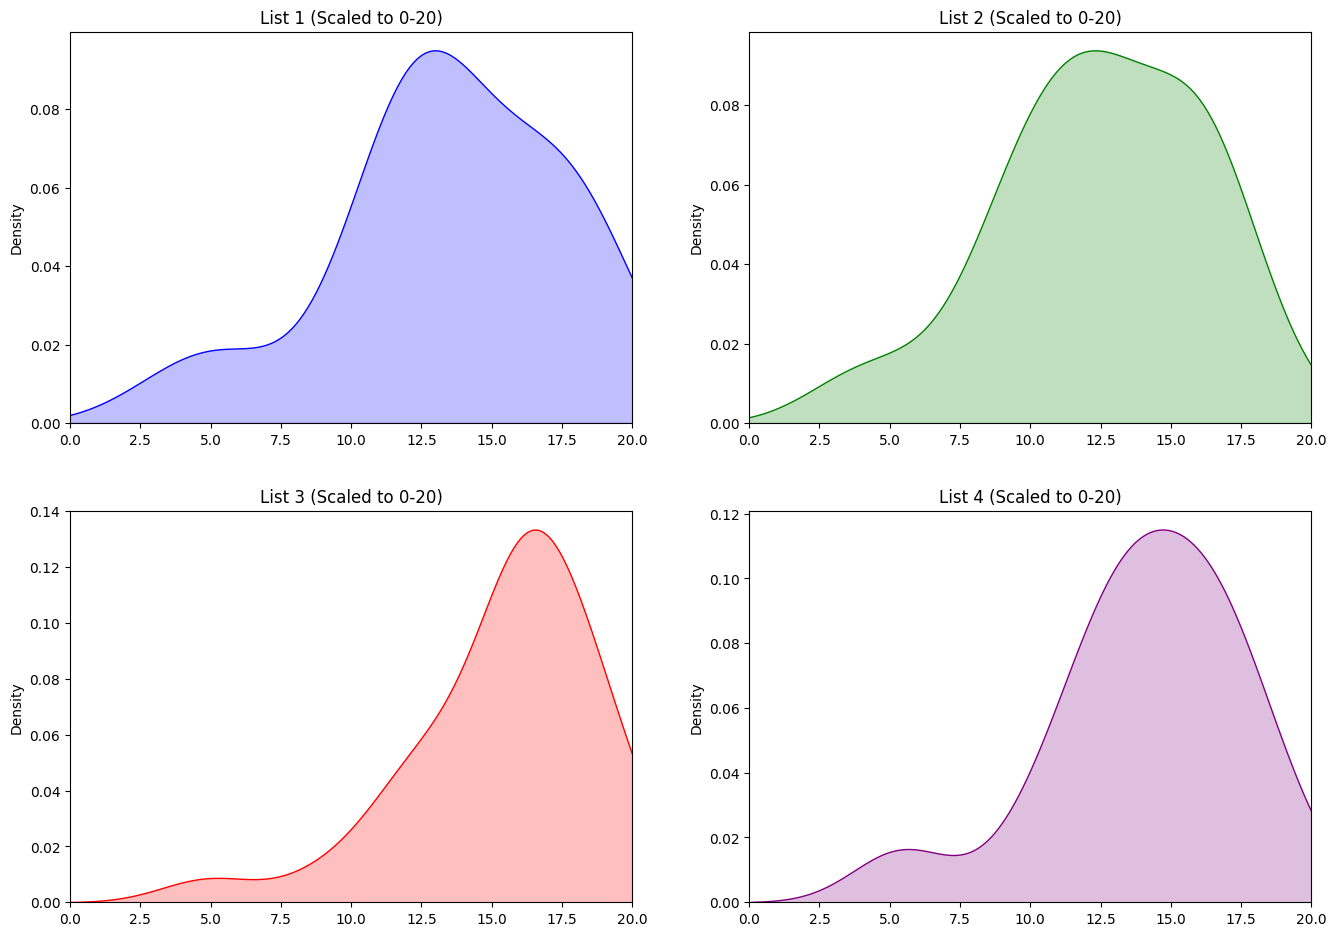

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot KDE plots for each scaled list
sns.kdeplot(list1_scaled, ax=axs[0, 0], fill=True, color='blue')
axs[0, 0].set_title('List 1 (Scaled to 0-20)')
axs[0, 0].set_xlim(0, 20)

sns.kdeplot(list2_scaled, ax=axs[0, 1], fill=True, color='green')
axs[0, 1].set_title('List 2 (Scaled to 0-20)')
axs[0, 1].set_xlim(0, 20)

sns.kdeplot(list3_scaled, ax=axs[1, 0], fill=True, color='red')
axs[1, 0].set_title('List 3 (Scaled to 0-20)')
axs[1, 0].set_xlim(0, 20)

sns.kdeplot(list4_scaled, ax=axs[1, 1], fill=True, color='purple')
axs[1, 1].set_title('List 4 (Scaled to 0-20)')
axs[1, 1].set_xlim(0, 20)

# Add some space between the plots
fig.tight_layout(pad=3.0)

# Display the plots
plt.show()


C:\Users\BARANLAPTOP\AppData\Local\Temp\ipykernel_14208\2293448213.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='List', y='Value', data=melted_data_scaled, palette='Set2')


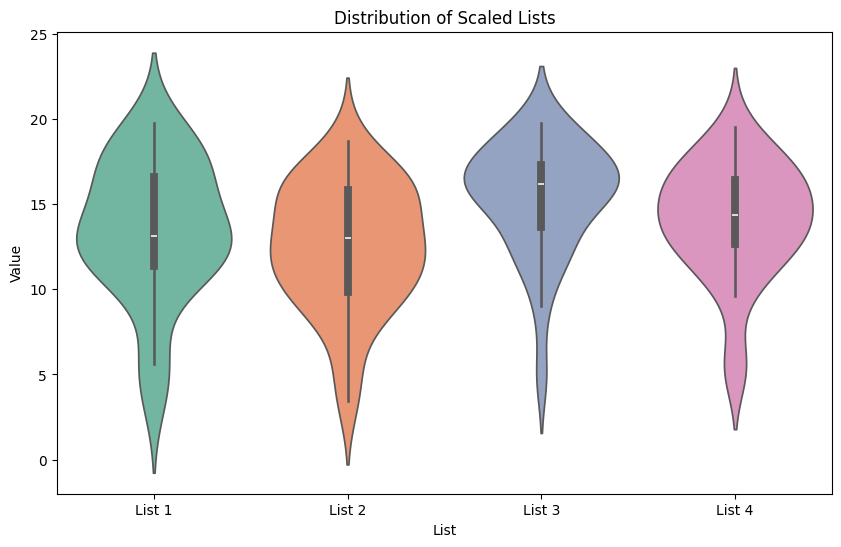

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier plotting with Seaborn
data_scaled = pd.DataFrame({
    'List 1': list1_scaled,
    'List 2': list2_scaled,
    'List 3': list3_scaled,
    'List 4': list4_scaled
})

# Melt the DataFrame for seaborn
melted_data_scaled = data_scaled.melt(var_name='List', value_name='Value')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='List', y='Value', data=melted_data_scaled, palette='Set2')

# Set the title
plt.title('Distribution of Scaled Lists')

# Display the plot
plt.show()


In [24]:
import numpy as np

# Calculate and print mean and standard deviation for each scaled list
means = [np.mean(list1_scaled), np.mean(list2_scaled), np.mean(list3_scaled), np.mean(list4_scaled)]
stds = [np.std(list1_scaled), np.std(list2_scaled), np.std(list3_scaled), np.std(list4_scaled)]

print("Means of scaled lists:", means)
print("Standard deviations of scaled lists:", stds)


Means of scaled lists: [13.482758620689655, 12.51206896551724, 15.37758620689655, 14.045172413793104]
Standard deviations of scaled lists: [3.992412542217208, 3.594623743497047, 3.239188547995458, 3.335041353917887]
